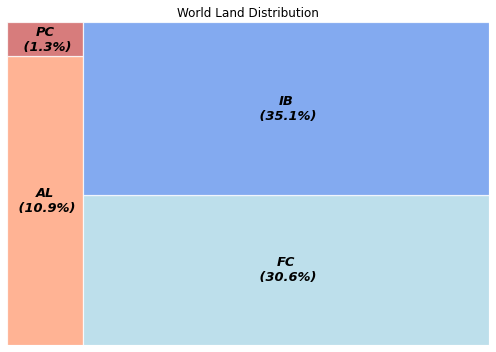

In [2]:
# I - Libraries
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import squarify 
import pandas as pd
import geopandas as gpd

# II- Download the reference table
wlands16 = pd.read_csv('/home/hmdg/Documents/Data_Science/Repos/Lands/data/wlands16.csv')
wlands16 = wlands16.copy()

# III
# --- Adding the relative values - percentage - of every type of land.
# It's needed the data in absolutes values of the 'Important sites for terrestrial biodiversity protected'.
# in order to obtain the general percentage of this indicator for the world.
# That is the only indicator that is comming just in percentage.


# Create the df with the total percentage of all the indicators(LA, AL, PC, FC and IB)
IB_abs = wlands16[['name_w', 'value', 'a_type']]
IB_abs = IB_abs.pivot(columns='a_type', index='name_w')
IB_abs.columns= IB_abs.columns.droplevel()
IB_abs['IB'] = 0.01 * IB_abs['IB%']*IB_abs['LA']
IB_abs = IB_abs[['LA', 'AL', 'PC', 'FC', 'IB']].sum()
IB_abs = pd.DataFrame(IB_abs)
IB_abs['perc'] = 100 * IB_abs[0].div(IB_abs.iloc[0].item())
IB_abs = IB_abs.reset_index()

# IV Function to plot the percentage distribution
%matplotlib inline

def sq_dist(df):
    fig = plt.figure(figsize=(7, 5)) 
    df = df.loc[1:]
    size = df['perc'].to_list()
    labels = df.apply(lambda x: str(x['a_type']) + "\n (" + str(round(x['perc'],1)) + "%)", axis=1)


    colors = ['lightsalmon', 'indianred', 'lightblue', 'cornflowerblue']

    ax = squarify.plot(sizes=size, 
                       alpha=0.8, 
                       color=colors, 
                       label=labels,
                       text_kwargs={'fontsize':13, 'family':'sans-serif', 'style':'italic', 'weight':'bold',
                          'multialignment':'center'},
                       bar_kwargs=dict(linewidth=1.2, edgecolor="white"))

    plt.title('World Land Distribution')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/squari_dist.png', bbox_inches='tight')
    return plt.show()

sq_dist(IB_abs)
